In [2]:
news_Art='nlp_Summarized_news_Art.csv'
import pandas as news_ArtP

news_Art_F = news_ArtP.read_csv(news_Art) 
news_Art_F

,News,news_cat
0,across decad pop music numer perform laud cham...,culture
1,exhibit africa fashion victoria albert museum ...,culture
2,us writer mark twain famous wrote thing new id...,culture
3,thing never chang shrink ted lasso creator bil...,culture
4,one mani reason origin last us consid feat vid...,culture
...,...,...
182,mean women script chines n shu rose promin th ...,travel
183,one task though seem imposs rememb qq number s...,travel
184,roughli km south shanghai face east china sea ...,travel
185,final sourc mysteri nois appear long two prong...,travel


In [3]:
news_Art_F.news_cat.value_counts()

travel     80
sport      72
culture    35
Name: news_cat, dtype: int64

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer as news_Art_Ftfvtr

news_Art_Fvtr = news_Art_Ftfvtr(analyzer='char', ngram_range= (1,1))
news_Art_F_Xxx = news_Art_Fvtr.fit_transform(news_Art_F['News'].values.astype('U')).toarray() 

In [5]:
print(news_Art_F_Xxx)

[[0.61473313 0.26384897 0.06533015 ... 0.00893907 0.06375593 0.00793946]
 [0.58826466 0.31645081 0.05519188 ... 0.01297156 0.03634587 0.00745478]
 [0.61023029 0.25145929 0.03834248 ... 0.00670953 0.04809057 0.0007712 ]
 ...
 [0.62662299 0.29322859 0.06047025 ... 0.01014517 0.06802903 0.01255788]
 [0.61079187 0.27786275 0.04268638 ... 0.01490639 0.02887608 0.00521453]
 [0.59555465 0.19746507 0.12407389 ... 0.02561973 0.02481478 0.        ]]


In [6]:
news_Art_F_Xxx.shape 

(187, 27)

In [7]:
news_Art_F_Yyy = news_Art_F['news_cat'] 
news_Art_F_Yyy.head(n=5)

0    culture
1    culture
2    culture
3    culture
4    culture
Name: news_cat, dtype: object

In [8]:
from sklearn.model_selection import train_test_split as news_Art_Ftrnst

news_Art_etiz =0.40
news_Art_adm = 8
news_Art_F_XxxR, news_Art_F_XxxS, news_Art_F_YyyR, news_Art_F_YyyS = news_Art_Ftrnst(news_Art_F_Xxx, news_Art_F_Yyy, test_size=news_Art_etiz, random_state= news_Art_adm)

print(news_Art_F_XxxR.shape) #training data 60%

(112, 27)


In [9]:
# test and validation-20% & 20%
news_Art_etiz1 =0.5 
news_Art_F_XxxV, news_Art_F_XxxS, news_Art_F_YyyV, news_Art_F_YyyS = news_Art_Ftrnst(news_Art_F_XxxS, news_Art_F_YyyS, test_size= news_Art_etiz1, random_state= news_Art_adm)

print(news_Art_F_XxxV.shape)
print(news_Art_F_XxxS.shape)

(37, 27)
(38, 27)


#### Boosting classifier

In [10]:
from sklearn.metrics import classification_report as news_Art_Fcln
from sklearn.metrics import confusion_matrix as news_Art_Fcfnn
from sklearn.metrics import ConfusionMatrixDisplay as news_Art_Fcfmr
from sklearn.model_selection import GridSearchCV as news_Art_Fgis
import time as news_Art_Fttt 

#### Adaboost classifier

In [11]:
from sklearn.ensemble import AdaBoostClassifier as news_Art_Fadb

In [12]:

import warnings as news_Art_Fwwggs
news_Art_Fwwggs.filterwarnings("ignore")

In [13]:

nws_athy = { 'algorithm': ['SAMME','SAMME.R'],
               'learning_rate': [1.0,2.0,3.0,4.0,5.0],
               'n_estimators':[50,60,70,80,90]}  


nws_athyvb = news_Art_Fadb(random_state=news_Art_adm)
nws_athyvb = news_Art_Fgis(nws_athyvb, nws_athy,
                          cv=2, verbose=1)
nws_athyvb.fit(news_Art_F_XxxR, news_Art_F_YyyR)

print("Checking hypr para-news_Art :", nws_athyvb.best_params_)
print("score-news_Art: ", nws_athyvb.best_score_)

Fitting 2 folds for each of 50 candidates, totalling 100 fits
Checking hypr para-news_Art : {'algorithm': 'SAMME', 'learning_rate': 1.0, 'n_estimators': 50}
score-news_Art:  0.6875



 training period: 0.11601853370666504 

              precision    recall  f1-score   support

     culture       0.60      0.38      0.46         8
       sport       0.92      0.86      0.89        14
      travel       0.68      0.87      0.76        15

    accuracy                           0.76        37
   macro avg       0.74      0.70      0.71        37
weighted avg       0.76      0.76      0.75        37


 validation period: 0.06843781471252441 



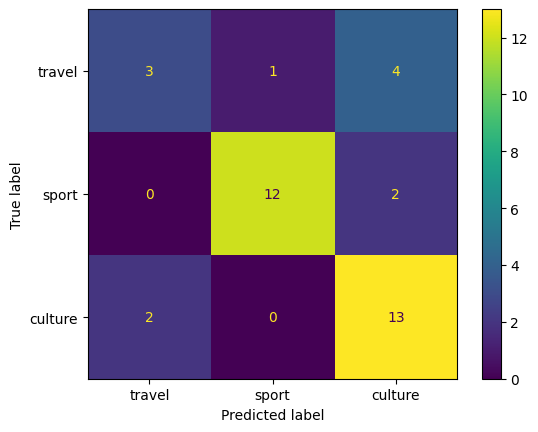

In [14]:
news_pdt11 = news_Art_Fttt.time() 

news_Art_mo1= news_Art_Fadb( algorithm='SAMME', learning_rate=1.0, n_estimators= 50) 
news_Art_mo1.fit(news_Art_F_XxxR, news_Art_F_YyyR)

news_pdt22 = news_Art_Fttt.time() 
print("\n training period:", news_pdt22-news_pdt11,"\n")


news_pdt11 = news_Art_Fttt.time()

news_Art_prc= news_Art_mo1.predict(news_Art_F_XxxV)

print(news_Art_Fcln(news_Art_F_YyyV, news_Art_prc))

g = news_Art_Fcfnn(news_Art_F_YyyV,news_Art_prc)
h = news_Art_Fcfmr(confusion_matrix = g, display_labels = ['travel','sport','culture'])
h.plot()

news_pdt22= news_Art_Fttt.time() 
print("\n validation period:", news_pdt22-news_pdt11,"\n")

#### Gradient boost classifier

In [15]:
from sklearn.ensemble import GradientBoostingClassifier as news_Art_Fgra

In [16]:

nws_athy = { 'loss': ['deviance','log_loss','exponential'],
               'criterion': ['squared_error','friedman_mse'],
               'learning_rate':[0.1,0.2,0.3,0.4,0.5],
            'min_samples_split':[2,3,4,5,6]}  


nws_athyvb = news_Art_Fgra(random_state=news_Art_adm)
nws_athyvb = news_Art_Fgis(nws_athyvb, nws_athy,
                          cv=2, verbose=1)
nws_athyvb.fit(news_Art_F_XxxR, news_Art_F_YyyR)

print("Checking hypr para-news_Art :", nws_athyvb.best_params_)
print("score-news_Art: ", nws_athyvb.best_score_)

Fitting 2 folds for each of 150 candidates, totalling 300 fits
Checking hypr para-news_Art : {'criterion': 'squared_error', 'learning_rate': 0.5, 'loss': 'deviance', 'min_samples_split': 5}
score-news_Art:  0.6964285714285714



 training period: 0.31496214866638184 

              precision    recall  f1-score   support

     culture       0.67      0.50      0.57         8
       sport       0.86      0.86      0.86        14
      travel       0.71      0.80      0.75        15

    accuracy                           0.76        37
   macro avg       0.74      0.72      0.73        37
weighted avg       0.75      0.76      0.75        37


 validation period: 0.05137896537780762 



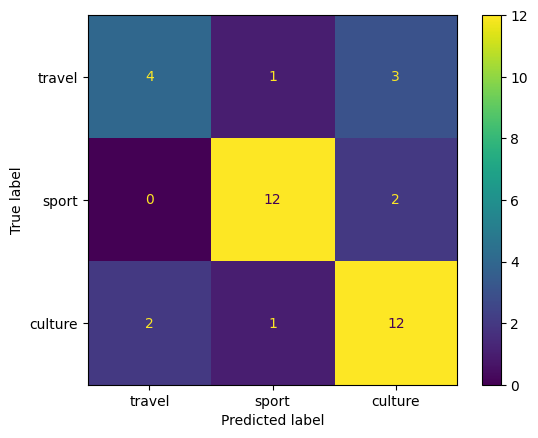

In [17]:
news_pdt11 = news_Art_Fttt.time() 

news_Art_mo2= news_Art_Fgra( criterion='squared_error', learning_rate=0.5, loss= 'deviance',min_samples_split=5) 
news_Art_mo2.fit(news_Art_F_XxxR, news_Art_F_YyyR)

news_pdt22 = news_Art_Fttt.time() 
print("\n training period:", news_pdt22-news_pdt11,"\n")


news_pdt11 = news_Art_Fttt.time()

news_Art_prc= news_Art_mo2.predict(news_Art_F_XxxV)

print(news_Art_Fcln(news_Art_F_YyyV, news_Art_prc))

g = news_Art_Fcfnn(news_Art_F_YyyV,news_Art_prc)
h = news_Art_Fcfmr(confusion_matrix = g, display_labels = ['travel','sport','culture'])
h.plot()

news_pdt22= news_Art_Fttt.time() 
print("\n validation period:", news_pdt22-news_pdt11,"\n")

#### Histogram gradient boost classifier

In [18]:
from sklearn.ensemble import HistGradientBoostingClassifier as news_Art_Fhsgd

In [19]:

nws_athy = { 'loss': ['binary_crossentropy','log_loss','categorical_crossentropy','auto'],
               'interaction_cst': ['no_interaction','pairwise'],
               'class_weight':['dict',None],
            'min_samples_leaf':[20,30,40,50]}  


nws_athyvb = news_Art_Fhsgd(random_state=news_Art_adm)
nws_athyvb = news_Art_Fgis(nws_athyvb, nws_athy,
                          cv=2, verbose=1)
nws_athyvb.fit(news_Art_F_XxxR, news_Art_F_YyyR)

print("Checking hypr para-news_Art :", nws_athyvb.best_params_)
print("score-news_Art: ", nws_athyvb.best_score_)

Fitting 2 folds for each of 64 candidates, totalling 128 fits
Checking hypr para-news_Art : {'class_weight': None, 'interaction_cst': 'pairwise', 'loss': 'log_loss', 'min_samples_leaf': 20}
score-news_Art:  0.625



 training period: 0.18269610404968262 

              precision    recall  f1-score   support

     culture       0.50      0.38      0.43         8
       sport       0.86      0.86      0.86        14
      travel       0.65      0.73      0.69        15

    accuracy                           0.70        37
   macro avg       0.67      0.66      0.66        37
weighted avg       0.69      0.70      0.70        37


 validation period: 0.04533839225769043 



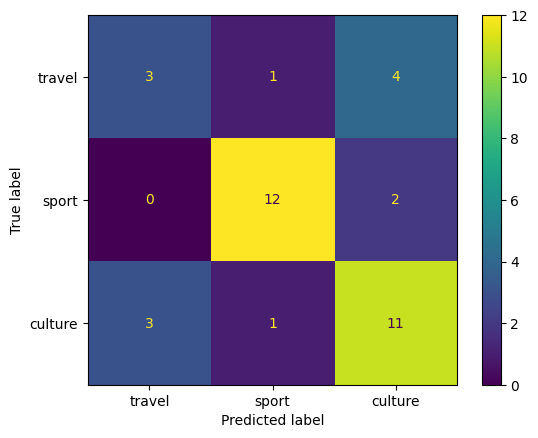

In [20]:
news_pdt11 = news_Art_Fttt.time() 

news_Art_mo3= news_Art_Fhsgd( class_weight=None, interaction_cst='pairwise', loss= 'log_loss',min_samples_leaf=20) 
news_Art_mo3.fit(news_Art_F_XxxR, news_Art_F_YyyR)

news_pdt22 = news_Art_Fttt.time() 
print("\n training period:", news_pdt22-news_pdt11,"\n")


news_pdt11 = news_Art_Fttt.time()

news_Art_prc= news_Art_mo3.predict(news_Art_F_XxxV)

print(news_Art_Fcln(news_Art_F_YyyV, news_Art_prc))

g = news_Art_Fcfnn(news_Art_F_YyyV,news_Art_prc)
h = news_Art_Fcfmr(confusion_matrix = g, display_labels = ['travel','sport','culture'])
h.plot()

news_pdt22= news_Art_Fttt.time() 
print("\n validation period:", news_pdt22-news_pdt11,"\n")

#### Cat boost classifier

In [21]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [22]:
from catboost import CatBoostClassifier as news_Art_Fcttt

In [23]:

nws_athy = { 'l2_leaf_reg': [3,4,5],
               'max_depth': [7,8,9,10,11],
               'iterations':[30,40,50,60,70],
            'learning_rate':[0.1,0.5,0.6,0.7,0.8]}  


nws_athyvb = news_Art_Fcttt(random_state=news_Art_adm)
nws_athyvb = news_Art_Fgis(nws_athyvb, nws_athy,
                          cv=2, verbose=1)
nws_athyvb.fit(news_Art_F_XxxR, news_Art_F_YyyR)

print("Checking hypr para-news_Art :", nws_athyvb.best_params_)
print("score-news_Art: ", nws_athyvb.best_score_)

Streaming output truncated to the last 5000 lines.
2:	learn: 0.8121043	total: 122ms	remaining: 2.73s
3:	learn: 0.7456386	total: 177ms	remaining: 2.91s
4:	learn: 0.6806127	total: 202ms	remaining: 2.63s
5:	learn: 0.6224704	total: 256ms	remaining: 2.73s
6:	learn: 0.5736086	total: 269ms	remaining: 2.42s
7:	learn: 0.5282240	total: 326ms	remaining: 2.52s
8:	learn: 0.4915715	total: 376ms	remaining: 2.55s
9:	learn: 0.4581482	total: 426ms	remaining: 2.55s
10:	learn: 0.4192726	total: 475ms	remaining: 2.55s
11:	learn: 0.3808210	total: 501ms	remaining: 2.42s
12:	learn: 0.3394072	total: 508ms	remaining: 2.23s
13:	learn: 0.3090140	total: 521ms	remaining: 2.08s
14:	learn: 0.2800141	total: 540ms	remaining: 1.98s
15:	learn: 0.2597039	total: 571ms	remaining: 1.93s
16:	learn: 0.2417120	total: 597ms	remaining: 1.86s
17:	learn: 0.2212410	total: 648ms	remaining: 1.87s
18:	learn: 0.2081174	total: 699ms	remaining: 1.88s
19:	learn: 0.1957198	total: 753ms	remaining: 1.88s
20:	learn: 0.1836834	total: 778ms	remai

0:	learn: 0.9697535	total: 22.6ms	remaining: 655ms
1:	learn: 0.8590480	total: 31.9ms	remaining: 447ms
2:	learn: 0.7605638	total: 40.3ms	remaining: 363ms
3:	learn: 0.6883119	total: 48.6ms	remaining: 316ms
4:	learn: 0.6226720	total: 57.6ms	remaining: 288ms
5:	learn: 0.5690687	total: 66.2ms	remaining: 265ms
6:	learn: 0.5167559	total: 74.8ms	remaining: 246ms
7:	learn: 0.4769382	total: 83.4ms	remaining: 229ms
8:	learn: 0.4320047	total: 92.1ms	remaining: 215ms
9:	learn: 0.3951836	total: 101ms	remaining: 202ms
10:	learn: 0.3671293	total: 110ms	remaining: 190ms
11:	learn: 0.3341076	total: 118ms	remaining: 177ms
12:	learn: 0.3075497	total: 127ms	remaining: 166ms
13:	learn: 0.2834700	total: 135ms	remaining: 154ms
14:	learn: 0.2636296	total: 144ms	remaining: 144ms
15:	learn: 0.2423585	total: 154ms	remaining: 134ms
16:	learn: 0.2234806	total: 165ms	remaining: 126ms
17:	learn: 0.2094813	total: 174ms	remaining: 116ms
18:	learn: 0.1916405	total: 182ms	remaining: 105ms
19:	learn: 0.1806085	total: 191m

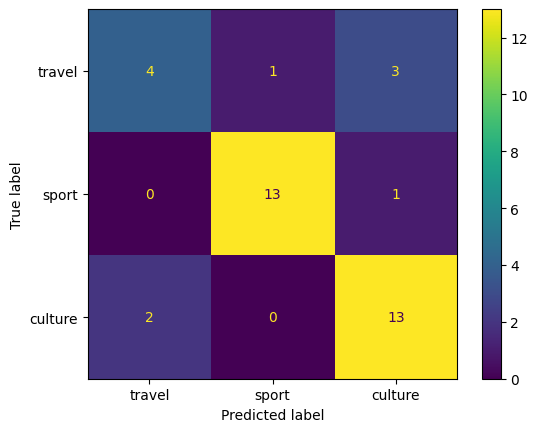

In [24]:
news_pdt11 = news_Art_Fttt.time() 

news_Art_mo4= news_Art_Fcttt( iterations=30, l2_leaf_reg=4, learning_rate= 0.6,max_depth=7) 
news_Art_mo4.fit(news_Art_F_XxxR, news_Art_F_YyyR)

news_pdt22 = news_Art_Fttt.time() 
print("\n training period:", news_pdt22-news_pdt11,"\n")


news_pdt11 = news_Art_Fttt.time()

news_Art_prc= news_Art_mo4.predict(news_Art_F_XxxV)

print(news_Art_Fcln(news_Art_F_YyyV, news_Art_prc))

g = news_Art_Fcfnn(news_Art_F_YyyV,news_Art_prc)
h = news_Art_Fcfmr(confusion_matrix = g, display_labels = ['travel','sport','culture'])
h.plot()

news_pdt22= news_Art_Fttt.time() 
print("\n validation period:", news_pdt22-news_pdt11,"\n")

#### Light GBm classifier

In [25]:
from lightgbm import LGBMClassifier as news_Art_Flbmc

In [26]:

nws_athy = { 'max_bin': [7,8,9,10,11,12],
               'subsample': [0.5,0.6,0.7,0.8,0.9],
               'num_leaves':[5,10,15,20],
            'max_depth':[6,7,8,9,10]}  


nws_athyvb = news_Art_Flbmc(random_state=news_Art_adm)
nws_athyvb = news_Art_Fgis(nws_athyvb, nws_athy,
                          cv=2, verbose=1)
nws_athyvb.fit(news_Art_F_XxxR, news_Art_F_YyyR)

print("Checking hypr para-news_Art :", nws_athyvb.best_params_)
print("score-news_Art: ", nws_athyvb.best_score_)

Fitting 2 folds for each of 600 candidates, totalling 1200 fits
Checking hypr para-news_Art : {'max_bin': 10, 'max_depth': 6, 'num_leaves': 5, 'subsample': 0.5}
score-news_Art:  0.6607142857142857



 training period: 0.028860807418823242 

              precision    recall  f1-score   support

     culture       0.57      0.50      0.53         8
       sport       0.81      0.93      0.87        14
      travel       0.71      0.67      0.69        15

    accuracy                           0.73        37
   macro avg       0.70      0.70      0.70        37
weighted avg       0.72      0.73      0.72        37


 validation period: 0.04150581359863281 



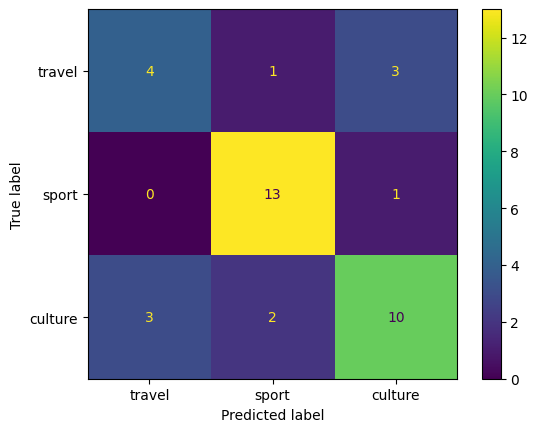

In [27]:
news_pdt11 = news_Art_Fttt.time() 

news_Art_mo5= news_Art_Flbmc( max_bin=10, max_depth=6, num_leaves= 5,subsample=0.5) 
news_Art_mo5.fit(news_Art_F_XxxR, news_Art_F_YyyR)

news_pdt22 = news_Art_Fttt.time() 
print("\n training period:", news_pdt22-news_pdt11,"\n")


news_pdt11 = news_Art_Fttt.time()

news_Art_prc= news_Art_mo5.predict(news_Art_F_XxxV)

print(news_Art_Fcln(news_Art_F_YyyV, news_Art_prc))

g = news_Art_Fcfnn(news_Art_F_YyyV,news_Art_prc)
h = news_Art_Fcfmr(confusion_matrix = g, display_labels = ['travel','sport','culture'])
h.plot()

news_pdt22= news_Art_Fttt.time() 
print("\n validation period:", news_pdt22-news_pdt11,"\n")

** Best algorithm is cat boost classifier. This algorithm has highest accuracy (81%)

#### Cat boost- test prediction

              precision    recall  f1-score   support

     culture       1.00      0.12      0.22         8
       sport       0.67      0.77      0.71        13
      travel       0.68      0.88      0.77        17

    accuracy                           0.68        38
   macro avg       0.78      0.59      0.57        38
weighted avg       0.74      0.68      0.64        38


 Testing period: 0.06658697128295898 



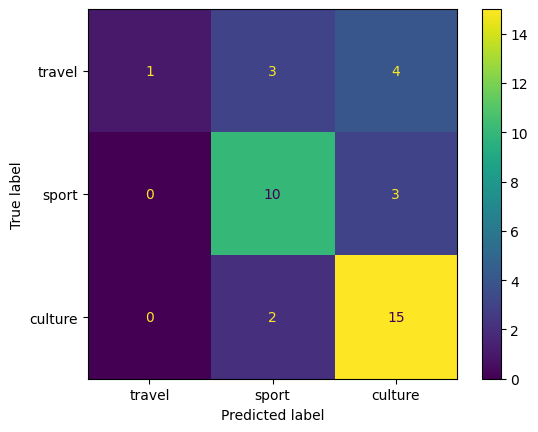

In [28]:
news_pdt11 = news_Art_Fttt.time()

news_Art_prc= news_Art_mo4.predict(news_Art_F_XxxS)

print(news_Art_Fcln(news_Art_F_YyyS, news_Art_prc))

g = news_Art_Fcfnn(news_Art_F_YyyS,news_Art_prc)
h = news_Art_Fcfmr(confusion_matrix = g, display_labels = ['travel','sport','culture'])
h.plot()

news_pdt22= news_Art_Fttt.time() 
print("\n Testing period:", news_pdt22-news_pdt11,"\n")